# **BOOTCAMP @ GIKI (Content designed by Usama Arshad) WEEK 2**

**Lab sessions you will conduct:**

---



*   Lab 6: Implementing SVM, Decision Trees, and Evaluation Metrics (Day 6)
* Lab 7: Implementing Unsupervised Learning Algorithms (Day 7)
* **Lab 8: Feature Engineering and Model Selection Techniques (Day 8)**
* Lab 9: Implementing Regression Models (Day 9)
* Lab 10: Implementing Classification Models (Day 10)

## Feature Scaling and Normalization

### Introduction to Feature Scaling
Feature scaling is a technique used to standardize the independent variables or features of data. In data preprocessing, it is important to scale the features so that they have a uniform contribution to the model's performance. This is especially crucial for algorithms that calculate distances between data points, such as K-Means clustering and Principal Component Analysis (PCA).

### Importance of Feature Scaling
- **Improved Performance**: Some machine learning algorithms perform better with scaled data.
- **Faster Convergence**: Algorithms converge more quickly when features are on similar scales.
- **Enhanced Interpretability**: Scaled features make models easier to interpret.

### Techniques for Feature Scaling
- **Min-Max Scaling**: Rescales the data to a fixed range, usually [0, 1]. Each feature is scaled as:

  \[
  X' = \frac{X - X_{min}}{X_{max} - X_{min}}
  \]

- **Standardization**: Scales the data to have a mean of 0 and a standard deviation of 1. Each feature is scaled as:

  \[
  X' = \frac{X - \mu}{\sigma}
  \]




Enter scaling method (minmax/standard) (default: minmax): minmax

### Original Data ###

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


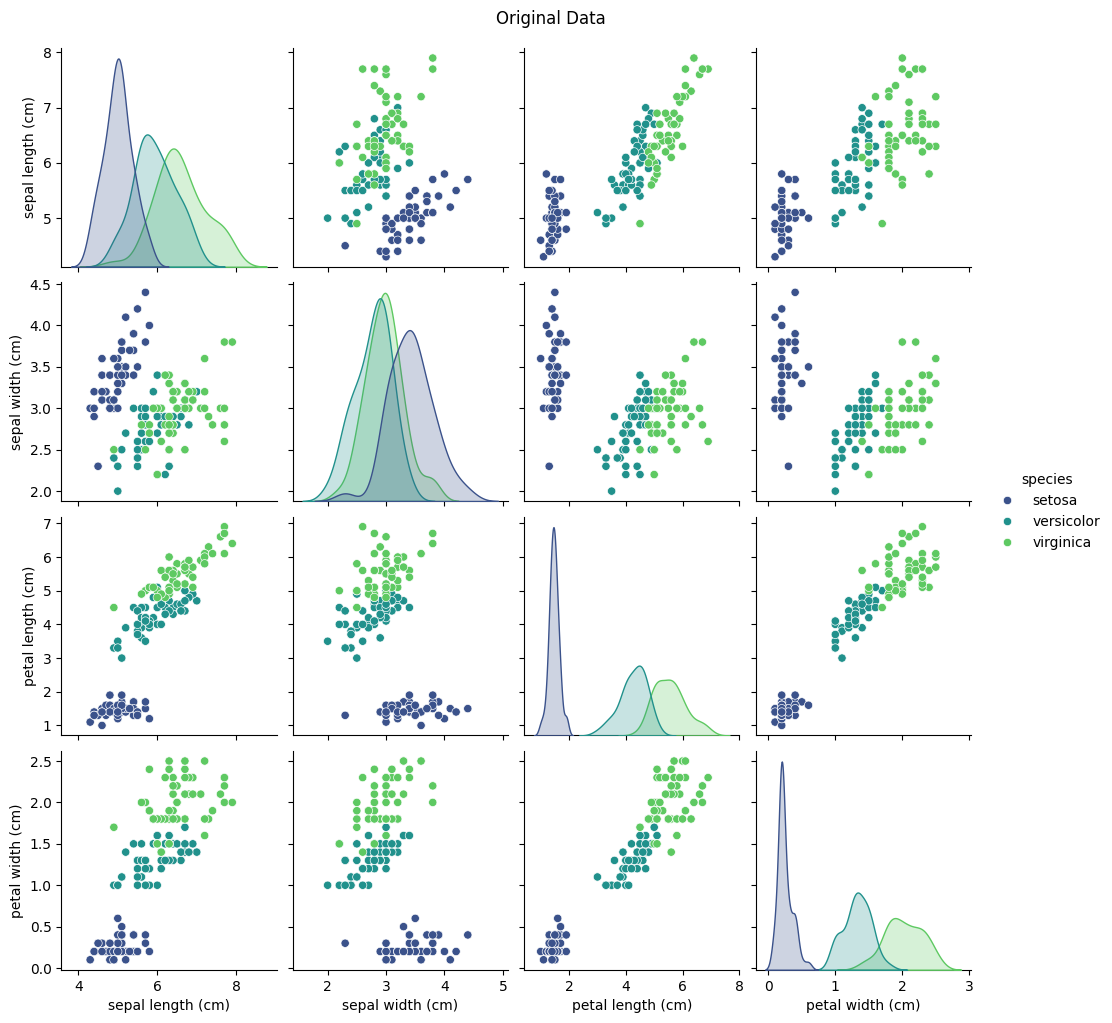


### Scaled Data ###

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            0.428704          0.440556           0.467458   
std             0.230018          0.181611           0.299203   
min             0.000000          0.000000           0.000000   
25%             0.222222          0.333333           0.101695   
50%             0.416667          0.416667           0.567797   
75%             0.583333          0.541667           0.694915   
max             1.000000          1.000000           1.000000   

       petal width (cm)  
count        150.000000  
mean           0.458056  
std            0.317599  
min            0.000000  
25%            0.083333  
50%            0.500000  
75%            0.708333  
max            1.000000  


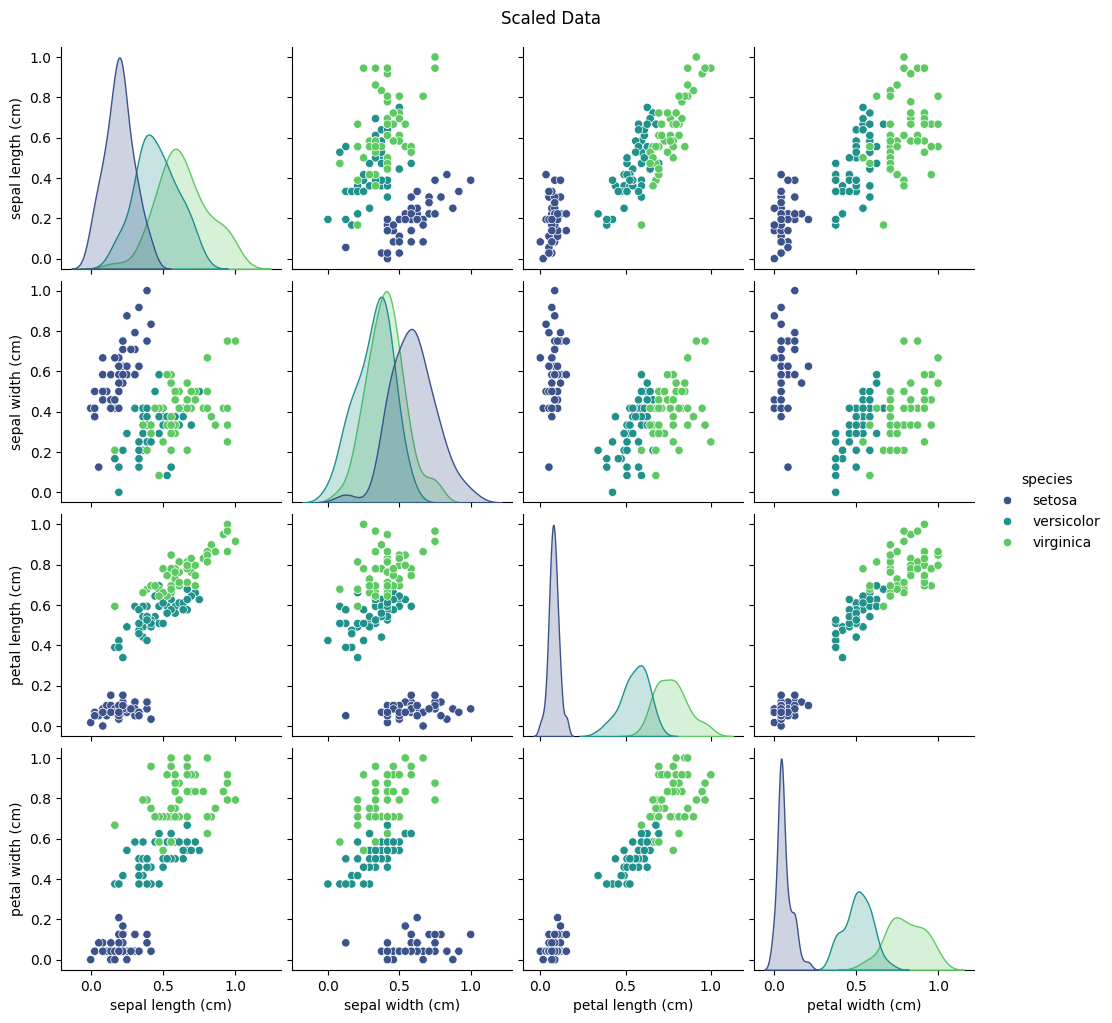

In the plots above, you can see the effect of minmax scaling on the dataset.


In [3]:
import numpy as np  # Importing NumPy for numerical operations
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import seaborn as sns  # Importing seaborn for enhanced visualizations
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Importing scalers from sklearn
from sklearn.datasets import load_iris  # Importing the Iris dataset from sklearn
import pandas as pd  # Importing pandas for DataFrame operations

# Function to get user input
def get_user_input(prompt, dtype, default):
    """
    Function to get user input with error handling.
    Parameters:
        prompt (str): The prompt to display to the user.
        dtype (type): The expected data type of the input.
        default: The default value to use if input is invalid or not provided.
    Returns:
        value: The user input converted to the specified data type or the default value.
    """
    try:
        return dtype(input(prompt + f" (default: {default}): ") or default)  # Attempt to get and convert user input
    except ValueError:
        print(f"Invalid input, using default value: {default}")  # Handle invalid input
        return default  # Return default value in case of invalid input

# Main function for Feature Scaling and Normalization
def feature_scaling_normalization():
    """
    Main function to demonstrate Feature Scaling and Normalization and visualize the results.
    """
    # Load the Iris dataset
    iris = load_iris()
    X = iris.data  # Feature data
    y = iris.target  # True labels
    feature_names = iris.feature_names  # Feature names

    # User input for scaling method
    scaling_method = get_user_input("Enter scaling method (minmax/standard)", str, "minmax")  # Get scaling method from user

    if scaling_method.lower() == "minmax":
        scaler = MinMaxScaler()  # Initialize Min-Max Scaler
    elif scaling_method.lower() == "standard":
        scaler = StandardScaler()  # Initialize Standard Scaler
    else:
        print("Invalid scaling method. Using Min-Max Scaler by default.")
        scaler = MinMaxScaler()  # Default to Min-Max Scaler

    # Apply Scaling
    X_scaled = scaler.fit_transform(X)  # Fit and transform the data

    # Convert to DataFrame for better visualization
    df_original = pd.DataFrame(X, columns=feature_names)
    df_original['species'] = pd.Categorical.from_codes(y, iris.target_names)  # Add species column for hue in pairplot
    df_scaled = pd.DataFrame(X_scaled, columns=feature_names)
    df_scaled['species'] = pd.Categorical.from_codes(y, iris.target_names)  # Add species column for hue in pairplot

    # Plotting original data
    print("\n### Original Data ###\n")
    print(df_original.describe())
    sns.pairplot(df_original, hue='species', palette='viridis')
    plt.suptitle("Original Data", y=1.02)
    plt.show()

    # Plotting scaled data
    print("\n### Scaled Data ###\n")
    print(df_scaled.describe())
    sns.pairplot(df_scaled, hue='species', palette='viridis')
    plt.suptitle("Scaled Data", y=1.02)
    plt.show()

    print(f"In the plots above, you can see the effect of {scaling_method} scaling on the dataset.")

# Run the Feature Scaling and Normalization function
feature_scaling_normalization()  # Execute the main function


## Feature Selection Techniques

### Introduction to Feature Selection
Feature selection is a process used in machine learning to select a subset of relevant features (variables, predictors) for use in model construction. By reducing the number of input variables, feature selection can improve model performance, decrease computation time, and reduce overfitting.

### Importance of Feature Selection
- **Improved Model Performance**: Removing irrelevant or less important features can improve the accuracy and performance of the model.
- **Reduced Overfitting**: Simplifies the model by reducing the number of features, which helps to avoid overfitting.
- **Faster Computation**: Reduces the computational cost and complexity, making the model faster to train and easier to interpret.
- **Enhanced Interpretability**: Makes the model simpler and more interpretable by focusing on the most important features.

### Techniques for Feature Selection
- **Filter Methods**: Select features based on statistical measures that score and rank each feature independently of the model. Examples include:
  - **Chi-Square Test**: Measures the association between categorical features and the target variable.
  - **ANOVA (Analysis of Variance)**: Measures the variance between groups and within groups to identify significant features.
  - **Correlation Coefficient**: Measures the linear relationship between continuous features and the target variable.

- **Wrapper Methods**: Select features by evaluating the performance of a model with different subsets of features. Examples include:
  - **Recursive Feature Elimination (RFE)**: Iteratively removes the least important features based on model performance.
  - **Forward Selection**: Starts with no features and adds one feature at a time based on model performance.
  - **Backward Elimination**: Starts with all features and removes the least significant feature at each step based on model performance.

- **Embedded Methods**: Perform feature selection as part of the model training process. Examples include:
  - **Lasso Regression (L1 Regularization)**: Shrinks the coefficients of less important features to zero.
  - **Decision Trees and Random Forests**: Evaluate feature importance based on their contribution to the decision-making process.




### Original Data ###

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


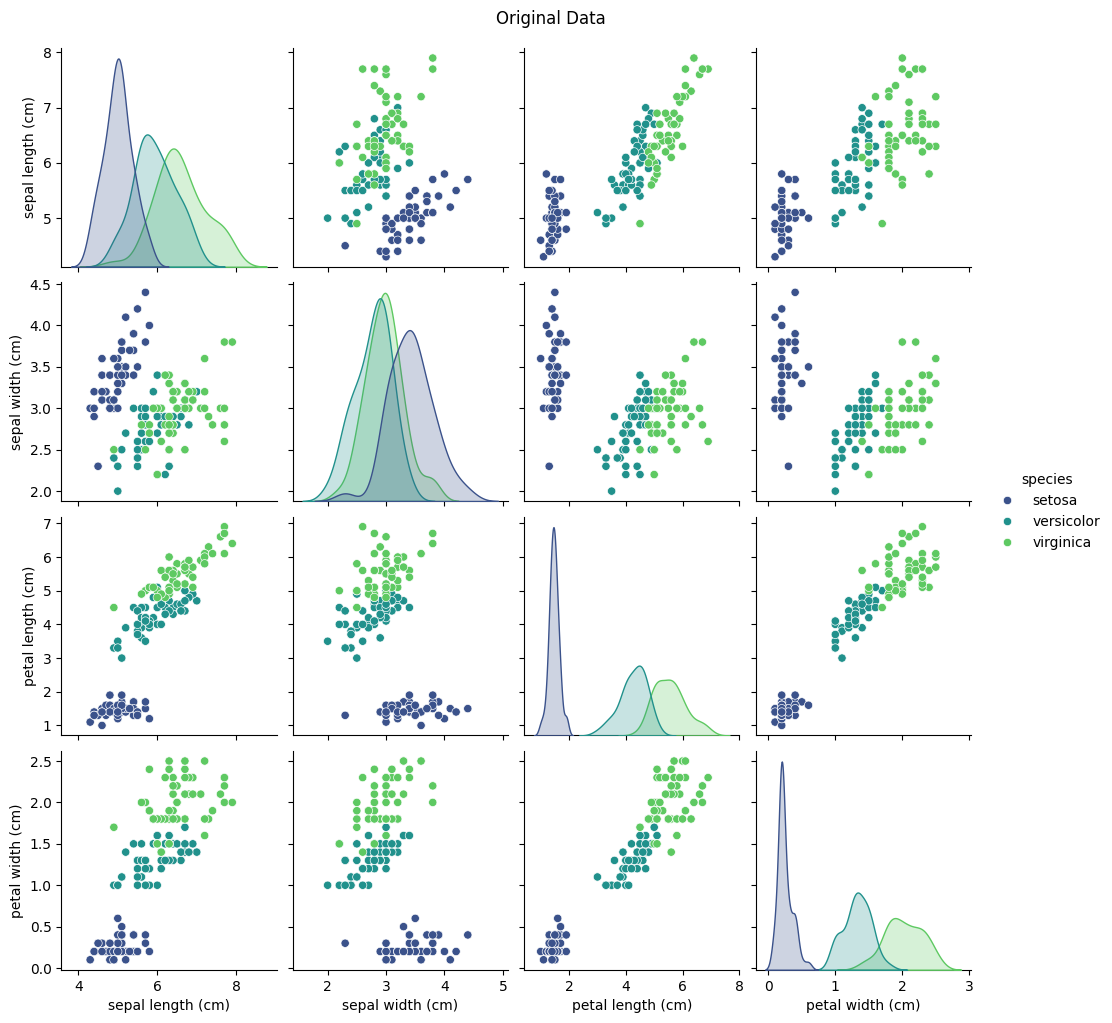

Selected Features (Chi-Square):
 [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]

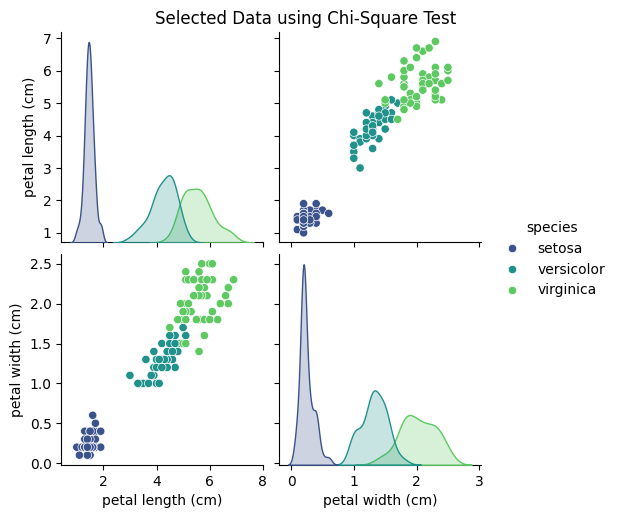


### Selected Data using Recursive Feature Elimination (RFE) ###

       petal length (cm)  petal width (cm)
count         150.000000        150.000000
mean            3.758000          1.199333
std             1.765298          0.762238
min             1.000000          0.100000
25%             1.600000          0.300000
50%             4.350000          1.300000
75%             5.100000          1.800000
max             6.900000          2.500000


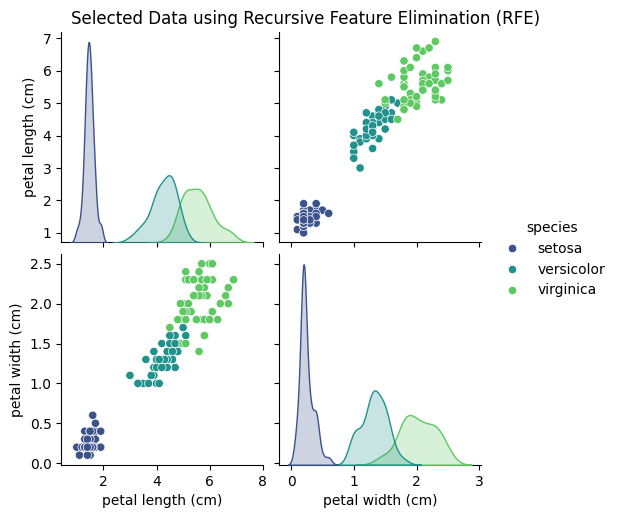


### Selected Data using Lasso Regression (L1 Regularization) ###

       petal width (cm)  petal length (cm)
count        150.000000         150.000000
mean           1.199333           3.758000
std            0.762238           1.765298
min            0.100000           1.000000
25%            0.300000           1.600000
50%            1.300000           4.350000
75%            1.800000           5.100000
max            2.500000           6.900000


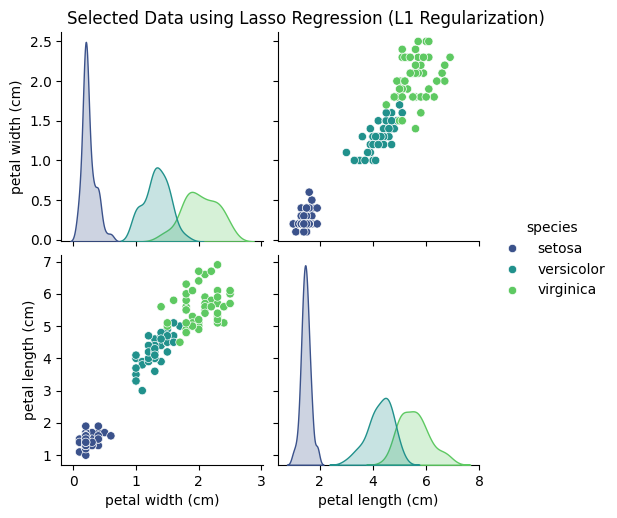

In [6]:
import numpy as np  # Importing NumPy for numerical operations
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import seaborn as sns  # Importing seaborn for enhanced visualizations
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris  # Importing the Iris dataset from sklearn
import pandas as pd  # Importing pandas for DataFrame operations

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Feature data
y = iris.target  # True labels
feature_names = iris.feature_names  # Feature names

# Convert to DataFrame for better visualization
df_original = pd.DataFrame(X, columns=feature_names)
df_original['species'] = pd.Categorical.from_codes(y, iris.target_names)  # Add species column for hue in pairplot

# Plotting original data
print("\n### Original Data ###\n")
print(df_original.describe())
sns.pairplot(df_original, hue='species', palette='viridis')
plt.suptitle("Original Data", y=1.02)
plt.show()

# Filter Method: Chi-Square Test
chi2_selector = SelectKBest(chi2, k=2)
X_kbest = chi2_selector.fit_transform(X, y)
print("Selected Features (Chi-Square):\n", X_kbest)
df_kbest = pd.DataFrame(X_kbest, columns=[feature_names[i] for i in chi2_selector.get_support(indices=True)])
df_kbest['species'] = pd.Categorical.from_codes(y, iris.target_names)

# Wrapper Method: Recursive Feature Elimination
model = LogisticRegression(max_iter=200)
rfe = RFE(model, n_features_to_select=2)
X_rfe = rfe.fit_transform(X, y)
print("Selected Features (RFE):\n", X_rfe)
df_rfe = pd.DataFrame(X_rfe, columns=[feature_names[i] for i in rfe.get_support(indices=True)])
df_rfe['species'] = pd.Categorical.from_codes(y, iris.target_names)

# Embedded Method: Lasso Regression (L1 Regularization)
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
selected_features_lasso = np.argsort(np.abs(lasso.coef_))[-2:]  # Select two most important features
X_lasso = X[:, selected_features_lasso]
print("Feature importance from Lasso:\n", lasso.coef_)
df_lasso = pd.DataFrame(X_lasso, columns=[feature_names[i] for i in selected_features_lasso])
df_lasso['species'] = pd.Categorical.from_codes(y, iris.target_names)

# Plotting selected data (Chi-Square)
print("\n### Selected Data using Chi-Square Test ###\n")
print(df_kbest.describe())
sns.pairplot(df_kbest, hue='species', palette='viridis')
plt.suptitle("Selected Data using Chi-Square Test", y=1.02)
plt.show()

# Plotting selected data (RFE)
print("\n### Selected Data using Recursive Feature Elimination (RFE) ###\n")
print(df_rfe.describe())
sns.pairplot(df_rfe, hue='species', palette='viridis')
plt.suptitle("Selected Data using Recursive Feature Elimination (RFE)", y=1.02)
plt.show()

# Plotting selected data (Lasso)
print("\n### Selected Data using Lasso Regression (L1 Regularization) ###\n")
print(df_lasso.describe())
sns.pairplot(df_lasso, hue='species', palette='viridis')
plt.suptitle("Selected Data using Lasso Regression (L1 Regularization)", y=1.02)
plt.show()


## Cross-Validation

### Introduction to Cross-Validation
Cross-validation is a statistical method used to estimate the performance of machine learning models. It involves splitting the dataset into training and validation sets multiple times in different ways and averaging the results to ensure that the model generalizes well to unseen data.

### Importance of Cross-Validation
- **Reliable Performance Estimation**: Provides a more accurate estimate of model performance compared to a single train-test split.
- **Model Generalization**: Helps in understanding how the model performs on different subsets of data, ensuring it generalizes well to new, unseen data.
- **Preventing Overfitting**: By evaluating the model on multiple train-test splits, cross-validation helps in identifying overfitting.

### Techniques for Cross-Validation
- **K-Fold Cross-Validation**: The dataset is divided into K equally sized folds. The model is trained on K-1 folds and validated on the remaining fold. This process is repeated K times, with each fold being used as the validation set once. The results are averaged to provide the final performance estimate.
- **Stratified K-Fold Cross-Validation**: Similar to K-Fold Cross-Validation, but ensures that each fold has the same proportion of classes as the original dataset. This is particularly useful for imbalanced datasets.
-**Leave-One-Out Cross-Validation (LOOCV)**: Each observation is used as a validation set while the remaining observations are used for training. This is repeated for each observation in the dataset. While LOOCV provides an unbiased estimate of model performance, it is computationally expensive for large datasets.

K-Fold Cross-Validation Scores: [1.         1.         0.93333333 0.96666667 0.96666667]
Mean K-Fold Score: 0.9733333333333334


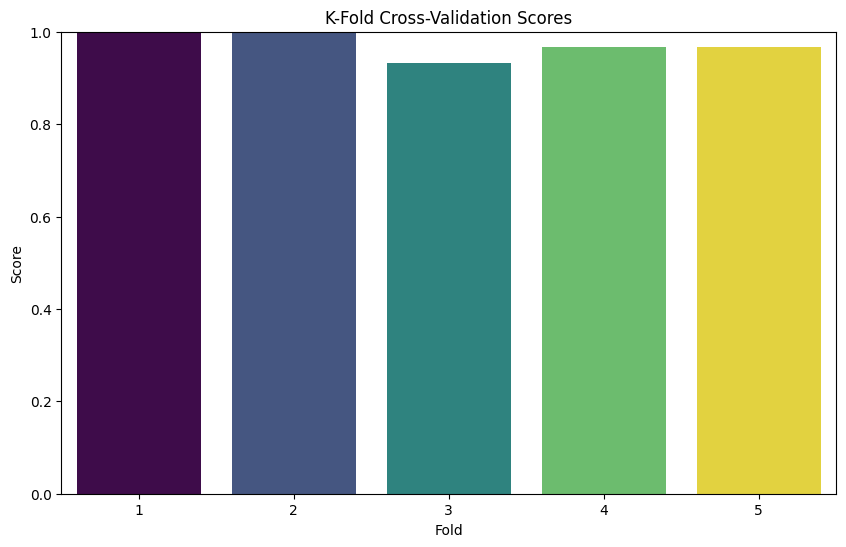

Stratified K-Fold Cross-Validation Scores: [1.         0.96666667 0.93333333 1.         0.93333333]
Mean Stratified K-Fold Score: 0.9666666666666668


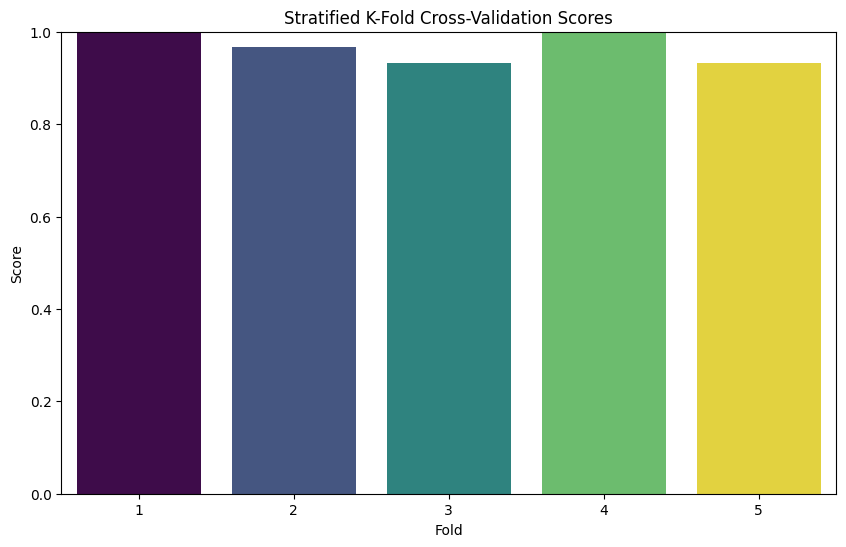

Leave-One-Out Cross-Validation Scores (First 10): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Leave-One-Out Score: 0.9666666666666667


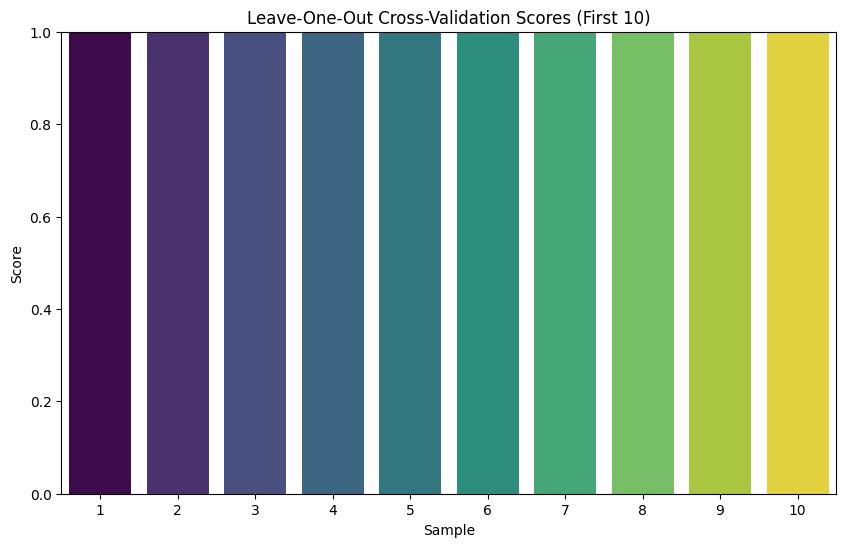

In [9]:
import numpy as np  # Importing NumPy for numerical operations
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import seaborn as sns  # Importing seaborn for enhanced visualizations
from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneOut, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris  # Importing the Iris dataset from sklearn
import pandas as pd  # Importing pandas for DataFrame operations

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Feature data
y = iris.target  # True labels
feature_names = iris.feature_names  # Feature names

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression(max_iter=200)
kf_scores = cross_val_score(model, X, y, cv=kf)
print("K-Fold Cross-Validation Scores:", kf_scores)
print("Mean K-Fold Score:", kf_scores.mean())

# Plotting K-Fold Cross-Validation Scores
plt.figure(figsize=(10, 6))
sns.barplot(x=list(range(1, len(kf_scores) + 1)), y=kf_scores, palette='viridis', hue=list(range(1, len(kf_scores) + 1)), dodge=False)
plt.title("K-Fold Cross-Validation Scores")
plt.xlabel("Fold")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend().remove()
plt.show()

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
skf_scores = cross_val_score(model, X, y, cv=skf)
print("Stratified K-Fold Cross-Validation Scores:", skf_scores)
print("Mean Stratified K-Fold Score:", skf_scores.mean())

# Plotting Stratified K-Fold Cross-Validation Scores
plt.figure(figsize=(10, 6))
sns.barplot(x=list(range(1, len(skf_scores) + 1)), y=skf_scores, palette='viridis', hue=list(range(1, len(skf_scores) + 1)), dodge=False)
plt.title("Stratified K-Fold Cross-Validation Scores")
plt.xlabel("Fold")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend().remove()
plt.show()

# Leave-One-Out Cross-Validation
loo = LeaveOneOut()
loo_scores = cross_val_score(model, X, y, cv=loo)
print("Leave-One-Out Cross-Validation Scores (First 10):", loo_scores[:10])  # Displaying only the first 10 scores for brevity
print("Mean Leave-One-Out Score:", loo_scores.mean())

# Plotting Leave-One-Out Cross-Validation Scores (first 10 for visualization)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(range(1, 11)), y=loo_scores[:10], palette='viridis', hue=list(range(1, 11)), dodge=False)
plt.title("Leave-One-Out Cross-Validation Scores (First 10)")
plt.xlabel("Sample")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend().remove()
plt.show()


## Hyperparameter Tuning

### Introduction to Hyperparameter Tuning
Hyperparameter tuning is the process of finding the optimal set of hyperparameters for a machine learning model. Hyperparameters are parameters whose values are set before the learning process begins and cannot be learned directly from the data. Examples include the learning rate, number of trees in a random forest, and the regularization parameter in regression models.

### Importance of Hyperparameter Tuning
- **Improved Model Performance**: Properly tuned hyperparameters can significantly improve the performance and accuracy of the model.
- **Model Generalization**: Helps the model to generalize better on unseen data by finding the right balance between underfitting and overfitting.
- **Optimized Training Time**: Finding the optimal hyperparameters can also reduce the training time and computational cost.

### Techniques for Hyperparameter Tuning
- **Grid Search**: An exhaustive search over a specified parameter grid. It evaluates all possible combinations of hyperparameters and selects the best one based on cross-validation performance.
- **Random Search**: Randomly samples parameter combinations from a specified range. It is less computationally expensive than grid search and can be more efficient in high-dimensional hyperparameter spaces.



### Grid Search ###

Grid Search is an exhaustive search over a specified parameter grid.
It evaluates all possible combinations of hyperparameters and selects the best one based on cross-validation performance.

Best Parameters (Grid Search): {'max_depth': None, 'n_estimators': 100}


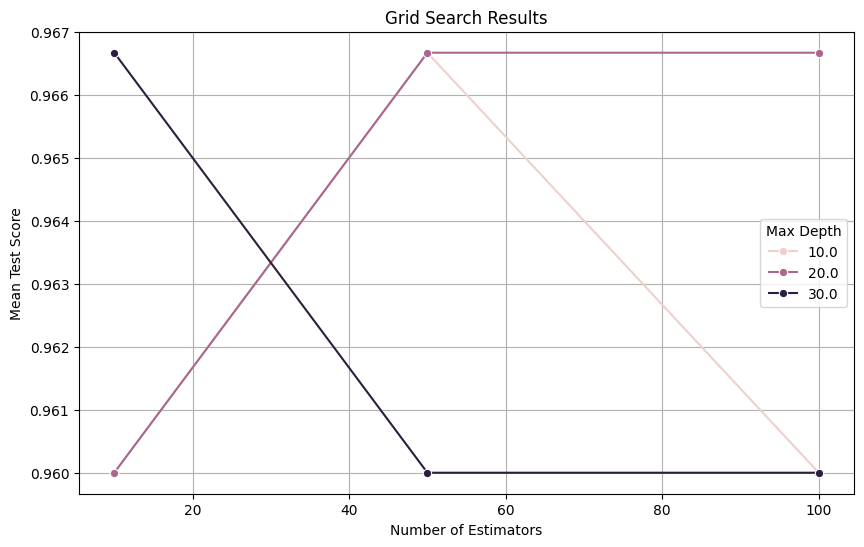

The plot shows the mean test scores for different combinations of 'n_estimators' and 'max_depth'.
The x-axis represents the number of estimators, the y-axis represents the mean test score, and different colors represent different values of 'max_depth'.

### Random Search ###

Random Search randomly samples parameter combinations from a specified range.
It is less computationally expensive than grid search and can be more efficient in high-dimensional hyperparameter spaces.

Best Parameters (Random Search): {'n_estimators': 50, 'max_depth': 30}


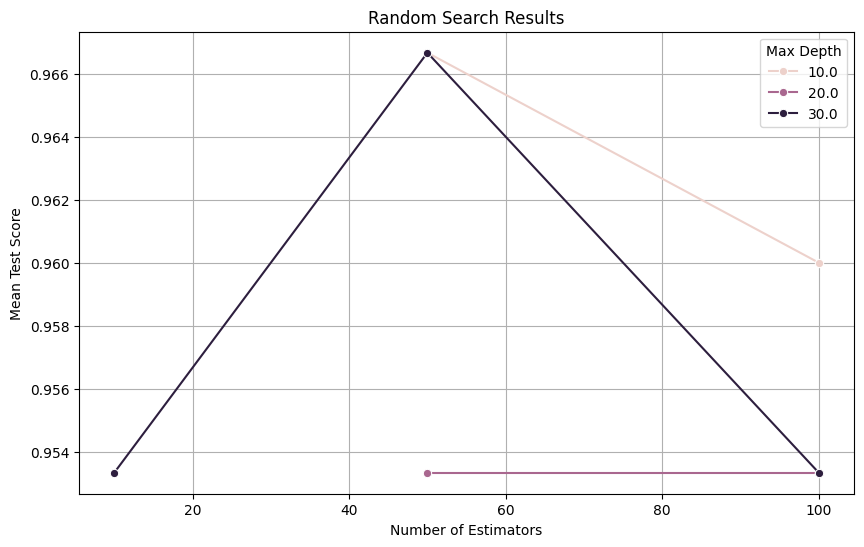

The plot shows the mean test scores for the sampled combinations of 'n_estimators' and 'max_depth'.
The x-axis represents the number of estimators, the y-axis represents the mean test score, and different colors represent different values of 'max_depth'.
The mean test score in the context of hyperparameter tuning and cross-validation is the average performance score of the model on the test sets across different folds of cross-validation.
 It provides an estimate of how well the model is expected to perform on unseen data. 


In [14]:
import numpy as np  # Importing NumPy for numerical operations
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import seaborn as sns  # Importing seaborn for enhanced visualizations
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris  # Importing the Iris dataset from sklearn
import pandas as pd  # Importing pandas for DataFrame operations

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Feature data
y = iris.target  # True labels

# Grid Search
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X, y)

print("### Grid Search ###")
print("\nGrid Search is an exhaustive search over a specified parameter grid.")
print("It evaluates all possible combinations of hyperparameters and selects the best one based on cross-validation performance.\n")
print("Best Parameters (Grid Search):", grid_search.best_params_)

# Convert grid search results to DataFrame
grid_search_results = pd.DataFrame(grid_search.cv_results_)

# Plotting Grid Search Results
plt.figure(figsize=(10, 6))
sns.lineplot(data=grid_search_results, x='param_n_estimators', y='mean_test_score', hue='param_max_depth', marker='o')
plt.title("Grid Search Results")
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Test Score")
plt.legend(title='Max Depth')
plt.grid(True)
plt.show()

print("The plot shows the mean test scores for different combinations of 'n_estimators' and 'max_depth'.")
print("The x-axis represents the number of estimators, the y-axis represents the mean test score, and different colors represent different values of 'max_depth'.\n")

# Random Search
param_dist = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30]
}
random_search = RandomizedSearchCV(RandomForestClassifier(), param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X, y)

print("### Random Search ###")
print("\nRandom Search randomly samples parameter combinations from a specified range.")
print("It is less computationally expensive than grid search and can be more efficient in high-dimensional hyperparameter spaces.\n")
print("Best Parameters (Random Search):", random_search.best_params_)

# Convert random search results to DataFrame
random_search_results = pd.DataFrame(random_search.cv_results_)

# Plotting Random Search Results
plt.figure(figsize=(10, 6))
sns.lineplot(data=random_search_results, x='param_n_estimators', y='mean_test_score', hue='param_max_depth', marker='o')
plt.title("Random Search Results")
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Test Score")
plt.legend(title='Max Depth')
plt.grid(True)
plt.show()

print("The plot shows the mean test scores for the sampled combinations of 'n_estimators' and 'max_depth'.")
print("The x-axis represents the number of estimators, the y-axis represents the mean test score, and different colors represent different values of 'max_depth'.\nThe mean test score in the context of hyperparameter tuning and cross-validation is the average performance score of the model on the test sets across different folds of cross-validation.\n It provides an estimate of how well the model is expected to perform on unseen data. ")
